This file contains processes of 
    1. Extracting Feature 
    2. Training and Testing Models 
    3. Evaluating Models 
    4. Predicting Nuetral Tweets to Positive or Negative
    5. Using Linear SVM to predict whole dataset sentiment

In [3]:
# Import packages
import os
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn
import time

In [4]:
# Load datasets
#Change working directory to script location
os.chdir(sys.path[0])

#Load the dataset
#Dataset that contains all sentiment to train TF-IDF model
df0 = pd.read_csv('processed_tweets.csv', engine='python', index_col=False)

#Dataset that only contains positive or negative
# sentiment to train the model
df1 = pd.read_csv('train.csv', engine='python', index_col=False)

#Dataset that only contains nuetral
df2 = pd.read_csv('predict.csv', engine='python', index_col=False)

1. Extracting Feature 

In [5]:
# 1.1 Extract feature using TF-IDF model
tf=TfidfVectorizer()
tf_model= tf.fit(df0['new_tweet_text'].values.astype('U'))

tf1= tf.transform(df1['new_tweet_text'].values.astype('U'))
tf2= tf.transform(df2['new_tweet_text'].values.astype('U')).toarray()

In [6]:
# 1.2 Show TF-IDF score
df_tfidf = pd.DataFrame(tf1[0].T.todense(), index=tf.get_feature_names(), columns=["TF-IDF"])
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf.head()

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
dailybeast,0.488436
p1nqwwzpk4,0.488436
die,0.298816
call,0.296405
pfizervaccine,0.264616


2. Training and Testing Models

In [7]:
# 2.1 Split to train (70%) and test (30%) set
X_train, X_test, y_train, y_test = train_test_split(tf1, df1['label'], test_size=0.3, random_state=1)

In [8]:
# 2.2 Define plot function
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
    plt.figure(figsize = (4,2))
    # Plot the confussion matrix
    sn.set(font_scale=1.2) #for label size
    sn.heatmap(df_cm,annot=True,fmt='.0f',annot_kws={"size": 15})# font size
    plt.show()


MultinomialNB Accuracy: 0.8232758620689655

Confusion Matrix:


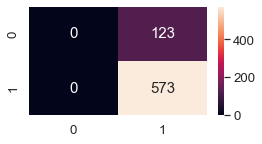


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.82      1.00      0.90       573

    accuracy                           0.82       696
   macro avg       0.41      0.50      0.45       696
weighted avg       0.68      0.82      0.74       696



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# 2.3 Train and test MNB model
mstart = time.time()
clf = MultinomialNB().fit(X_train, y_train)
predictions= clf.predict(X_test)
mend = time.time()
mtime = mend - mstart
print("\nMultinomialNB Accuracy:",metrics.accuracy_score(y_test, predictions))
print("\nConfusion Matrix:")
plot_confussion_matrix(y_test, predictions)
print("\nClassification Report: \n", classification_report(y_test,predictions))


SVM Accuracy: 0.8290229885057471

Confusion Matrix:


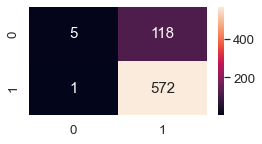


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.04      0.08       123
           1       0.83      1.00      0.91       573

    accuracy                           0.83       696
   macro avg       0.83      0.52      0.49       696
weighted avg       0.83      0.83      0.76       696



In [10]:
# 2.4 Train and test Linear SVM model
sstart = time.time()
clf = svm.SVC().fit(X_train, y_train)
predictions= clf.predict(X_test)
send = time.time()
stime = send - sstart
print("\nSVM Accuracy:",metrics.accuracy_score(y_test, predictions))
print("\nConfusion Matrix:")
plot_confussion_matrix(y_test, predictions)
print("\nClassification Report: \n", classification_report(y_test,predictions))

3. Evaluate Models

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


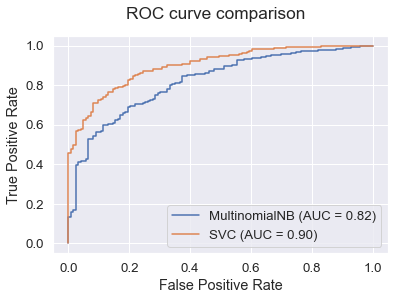

In [11]:
# 3.1 Evaluate models using ROC
mclf = MultinomialNB().fit(X_train, y_train)
sclf = svm.SVC().fit(X_train, y_train)

m_disp = plot_roc_curve(mclf, X_test, y_test)
s_disp = plot_roc_curve(sclf, X_test, y_test, ax=m_disp.ax_)
s_disp.figure_.suptitle("ROC curve comparison")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

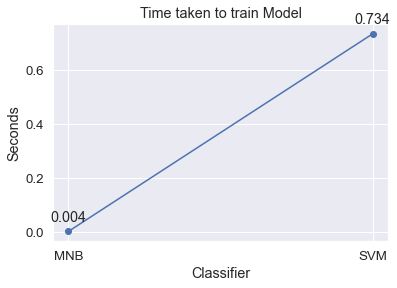

In [12]:
# 3.2 Evaluate by models process time
cla = ['MNB','SVM']
time = [mtime, stime]
plt.plot(cla, time, 'bo-')
plt.title('Time taken to train Model')
plt.xlabel('Classifier')
plt.ylabel('Seconds')

for x,y in zip(cla,time):
    label = "{:.3f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

4. Predict Nuetral Tweets to Positive or Negetive

In [13]:
# 4.1 Classify nuetral to positive or negative
#From result above, SVM performs better than NMB, here use SVM to predict the sentiment
predict_tf2 = sclf.predict(tf2)
df2['new_label'] = predict_tf2.tolist()
df2.head()

,label,new_tweet_text,new_label
0,2,pranam message today manifest dhyan meenaprana...,1
1,2,hyderabad base bharatbiotech seek fund governm...,1
2,2,time aerolneas flight ar1068 go moscow pick sp...,1
3,2,day moderna covid19vaccine arm little sore lit...,1
4,2,get moderna pfitzer vaccine india narendramodi...,1


In [14]:
# 4.2 Show class distiribution
df2.groupby('new_label').size() 

new_label
0       8
1    3672
dtype: int64

In [15]:
# 4.3 Combine with dataset that only has positive/negative Tweets
df2 = df2.iloc[: , 1:]
df2.columns = ['new_tweet_text', 'label']
df2 = df2[['label', 'new_tweet_text']]
df3 = df1.append(df2)

5. Using Linear SVM to predict whole dataset sentiment

In [16]:
# 5.1 Vectorise the whole dataset
tf3= tf.transform(df3['new_tweet_text'].values.astype('U'))

In [17]:
# 5.2 Predict the whole dataset sentiment
predict_tf3 = sclf.predict(tf3)

In [18]:
# 5.3 Show predicted sentiment distribution
df3['label'] = predict_tf3.tolist()
df3.groupby('label').size() 

label
0     297
1    5703
dtype: int64